In [34]:
import stable_baselines3

In [35]:
from stable_baselines3 import PPO
from gym_pybullet_drones.envs.single_agent_rl import HoverIMU, HoverGPS, HoverFullState


In [36]:
agent = PPO(
    'MlpPolicy', 
    env=HoverIMU(),
    verbose=0,
    # tensorboard_log=exp_dir,
    # policy_kwargs=dict(net_arch=dict(pi=[64*model_scale, 64*model_scale], qf=[64*model_scale, 64*model_scale])),
    # n_steps=buffer_size,
    # batch_size=batch_size
)

<Element 'properties' at 0x7093e463cc70>
Frequency  1000


/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [37]:
import numpy as np
a = np.array([1., 2., 3.])
a

array([1., 2., 3.])

In [38]:
from scipy.spatial.transform import Rotation as R
import numpy as np

In [39]:
rot = R.from_euler("xyz", np.array([360, 0, 0]), degrees=True)

In [40]:
rot.apply([0, 0, 1])

array([0.0000000e+00, 2.4492936e-16, 1.0000000e+00])

In [41]:
np.linspace(0.0, 360 - 360/8, 8)

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [42]:
points = [
    np.array([0., 0., 1.]),
    np.array([0., 0., -1.])
]
for pitch in np.linspace(180/4, 180 - 180/4, 3):
    for yaw in np.linspace(0.0, 360 - 360/8, 8):
        rot = R.from_euler("xyz", np.array([0, pitch, yaw]), degrees=True)
        points.append(rot.apply([0, 0, 1]))

points = np.array(points)

In [43]:
np.concatenate((points, points*2)).shape

(52, 3)

In [44]:
points.shape

(26, 3)

In [45]:
points.round(3)

array([[ 0.   ,  0.   ,  1.   ],
       [ 0.   ,  0.   , -1.   ],
       [ 0.707,  0.   ,  0.707],
       [ 0.5  ,  0.5  ,  0.707],
       [ 0.   ,  0.707,  0.707],
       [-0.5  ,  0.5  ,  0.707],
       [-0.707,  0.   ,  0.707],
       [-0.5  , -0.5  ,  0.707],
       [-0.   , -0.707,  0.707],
       [ 0.5  , -0.5  ,  0.707],
       [ 1.   ,  0.   ,  0.   ],
       [ 0.707,  0.707,  0.   ],
       [ 0.   ,  1.   ,  0.   ],
       [-0.707,  0.707,  0.   ],
       [-1.   ,  0.   ,  0.   ],
       [-0.707, -0.707,  0.   ],
       [-0.   , -1.   ,  0.   ],
       [ 0.707, -0.707,  0.   ],
       [ 0.707,  0.   , -0.707],
       [ 0.5  ,  0.5  , -0.707],
       [ 0.   ,  0.707, -0.707],
       [-0.5  ,  0.5  , -0.707],
       [-0.707,  0.   , -0.707],
       [-0.5  , -0.5  , -0.707],
       [-0.   , -0.707, -0.707],
       [ 0.5  , -0.5  , -0.707]])

In [46]:
points.shape

(26, 3)

In [47]:
points[:, 0]

array([ 0.00000000e+00,  0.00000000e+00,  7.07106781e-01,  5.00000000e-01,
        1.11022302e-16, -5.00000000e-01, -7.07106781e-01, -5.00000000e-01,
       -1.11022302e-16,  5.00000000e-01,  1.00000000e+00,  7.07106781e-01,
        2.22044605e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.22044605e-16,  7.07106781e-01,  7.07106781e-01,  5.00000000e-01,
        1.11022302e-16, -5.00000000e-01, -7.07106781e-01, -5.00000000e-01,
       -1.11022302e-16,  5.00000000e-01])

In [48]:
points[:2][0], points[:2][1]

(array([0., 0., 1.]), array([ 0.,  0., -1.]))

In [49]:
import matplotlib.pyplot as plt

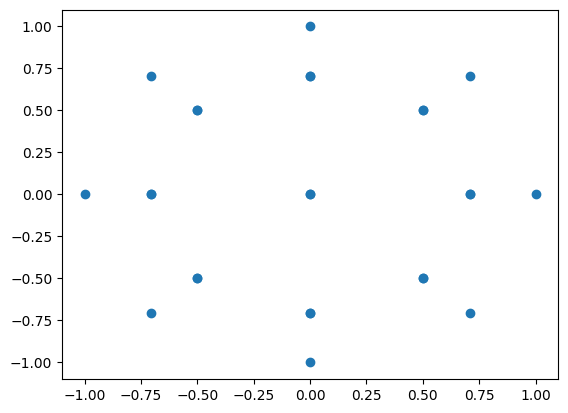

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(points[:,0], points[:, 1])

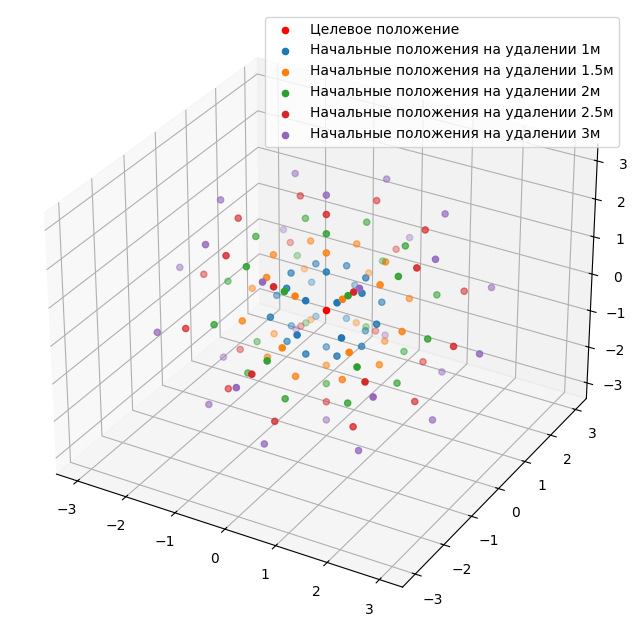

In [69]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(0, 0, 0, color='r')
ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(points[:,0]*1.5, points[:,1]*1.5, points[:,2]*1.5)
ax.scatter(points[:,0]*2., points[:,1]*2., points[:,2]*2.)
ax.scatter(points[:,0]*2.5, points[:,1]*2.5, points[:,2]*2.5)
ax.scatter(points[:,0]*3., points[:,1]*3., points[:,2]*3.)
ax.legend([
    'Целевое положение', 
    'Начальные положения на удалении 1м', 
    'Начальные положения на удалении 1.5м', 
    'Начальные положения на удалении 2м', 
    'Начальные положения на удалении 2.5м', 
    'Начальные положения на удалении 3м', 
], loc='best')

In [82]:
# 0.5 success rate 1.0
rates = np.array([[1.0, 1.0, 1.0],
    [1.5, 1.0, 1.0],
    [2.0, 0.8076923076923077, 1.0],
    [2.5, 0.7307692307692307, 0.9615384615384616],
    [3.0, 0.6538461538461539, 0.8076923076923077],
    [3.5, 0.6153846153846154, 0.7307692307692307],
    [4.0, 0.5384615384615384, 0.6538461538461539],
    [4.5, 0.5384615384615384, 0.6538461538461539],
    [5.0, 0.4230769230769231, 0.6923076923076923],
    [5.5, 0.3076923076923077, 0.6538461538461539],
    [6.0, 0.3076923076923077, 0.5384615384615384],
    [6.5, 0.34615384615384615, 0.46153846153846156],
    [7.0, 0.2692307692307692, 0.3076923076923077],
    [7.5, 0.2692307692307692, 0.3076923076923077],
    [8.0, 0.3076923076923077, 0.3076923076923077],
    [8.5, 0.2692307692307692, 0.34615384615384615],
    [9.0, 0.3076923076923077, 0.3076923076923077],
    [9.5, 0.23076923076923078, 0.3076923076923077],
    [10.0, 0.23076923076923078, 0.23076923076923078]
])


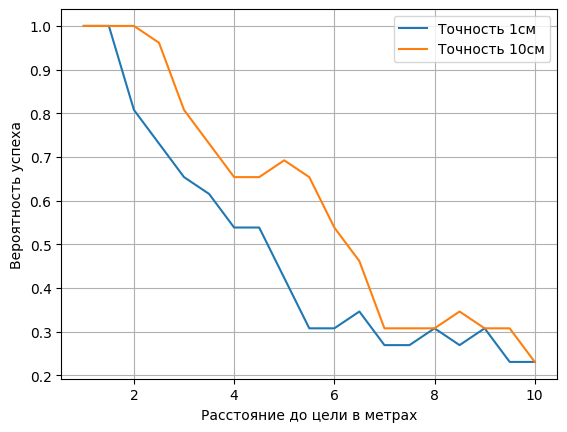

In [87]:
plt.plot(rates[:, 0], rates[:, 1])
plt.plot(rates[:, 0], rates[:, 2])
plt.xlabel("Расстояние до цели в метрах")
plt.ylabel("Вероятность успеха")
plt.grid()
plt.legend(
    ['Точность 1см',
    'Точность 10см']
)

In [131]:
np.random.rand(*rates[:, 1].shape)

array([0.55934515, 0.36265043, 0.38148458, 0.99296318, 0.90369408,
       0.74694362, 0.84451948, 0.6218462 , 0.62822523, 0.96344821,
       0.80132444, 0.40410221, 0.50611341, 0.53812369, 0.85078264,
       0.79331358, 0.52287836, 0.94054507, 0.6778334 ])

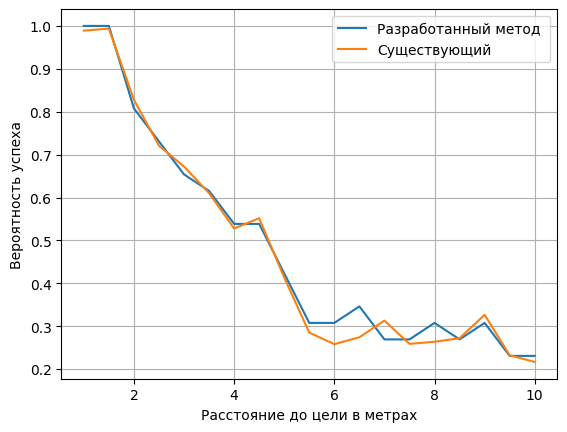

In [184]:
plt.plot(rates[:, 0], rates[:, 1])
# plt.plot(rates[:, 0], np.clip(np.exp(1.5*(-1+1*rates[:, 1]/(rates[:, 0]**1.2))), 0,a_max=1))
# plt.plot(rates[:, 0], np.clip(np.exp((-1+1*rates[:, 1])), 0,a_max=1))
plt.plot(rates[:, 0], np.clip(rates[:, 1]-np.random.randn(*rates[:, 1].shape)*0.02-rates[:, 0]/500, 0, 1))

plt.xlabel("Расстояние до цели в метрах")
plt.ylabel("Вероятность успеха")
plt.grid()
plt.legend(
    ['Разработанный метод ',
    'Существующий']
)

In [54]:
plt

<module 'matplotlib.pyplot' from '/home/led/miniconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [55]:
np.linspace(.0, 360, 8)

array([  0.        ,  51.42857143, 102.85714286, 154.28571429,
       205.71428571, 257.14285714, 308.57142857, 360.        ])

In [56]:
rot.as_matrix()

array([[-0.5       ,  0.70710678,  0.5       ],
       [ 0.5       ,  0.70710678, -0.5       ],
       [-0.70710678,  0.        , -0.70710678]])

In [57]:
4*1.9571e-08*(24000**2)

45.091584

In [58]:
def get_command(alpha, max_vel=40):
    new_pos = np.array([0, 0, 20])
    command = (np.random.rand(4)*2 - 1)*alpha
    command[0]=0
    rot = R.from_euler("zyx", command[:3]*180, degrees=True)
    command[:3] = rot.apply([0, 0, 1])

    # command[3] *= self.drone.max_speed/(2-self.alpha)
    command[3] = max_vel*(0.5 + 0.5*command[3])
    return command

In [59]:
get_command(0.01)

array([-1.20831361e-02,  3.70192767e-03,  9.99920144e-01,  2.01227980e+01])

In [60]:
np.exp(-400)*200

3.830339193428011e-172

In [61]:
a *=2/3
a

array([0.66666667, 1.33333333, 2.        ])

In [62]:
model_scale = 1
agent2 = PPO(
    'MlpPolicy', 
    env=HoverIMU(),
    verbose=0,
    # tensorboard_log=exp_dir,
    policy_kwargs=dict(net_arch=dict(pi=[64*model_scale, 64*model_scale], vf=[64*model_scale, 64*model_scale])),
    # n_steps=buffer_size,
    # batch_size=batch_size
)

<Element 'properties' at 0x7093e43e48b0>
Frequency  1000


In [63]:
agent.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=7, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=7, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [64]:
import numpy as np

In [65]:
np.int256

AttributeError: module 'numpy' has no attribute 'int256'

In [ ]:
seed = np.random.randint(0, 65000)
np.random.seed(seed=seed)

In [ ]:
agent2.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=7, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=7, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
results = [
    np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_40/evaluations.npz'),
    np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_42/evaluations.npz'),
    np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_43/evaluations.npz'),
    np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_44/evaluations.npz'),
    np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_22/evaluations.npz')
]

# data = np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_43/evaluations.npz')
# np.load('/home/led/robotics/engines/Bullet_sym/gym-pybullet-drones/gym_pybullet_drones/results/hover/multienv/PPO_43/evaluations.npz')


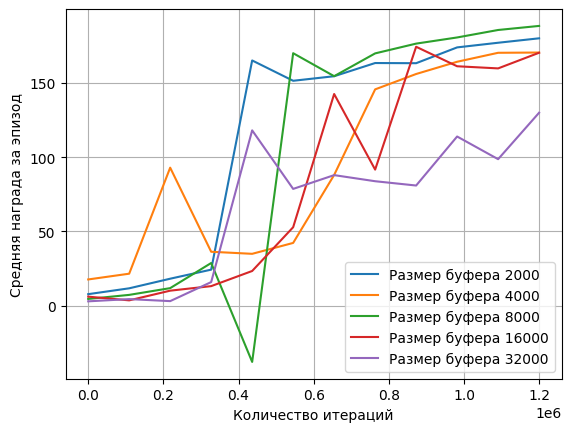

In [ ]:
timesteps = np.linspace(0, 1.2e6, 12)
plt.grid()
plt.plot(timesteps,results[0]['results'][:12, :].mean(axis=1))
plt.plot(timesteps,results[1]['results'][:12, :].mean(axis=1))
plt.plot(timesteps,results[2]['results'][:12, :].mean(axis=1))
plt.plot(timesteps, results[3]['results'][:12, :].mean(axis=1))
plt.plot(timesteps, results[4]['results'][:12, :].mean(axis=1))
plt.xlabel('Количество итераций')
plt.ylabel('Средняя награда за эпизод')
plt.legend([
    'Размер буфера 2000',
    'Размер буфера 4000',
    'Размер буфера 8000',
    'Размер буфера 16000',
    'Размер буфера 32000',
])

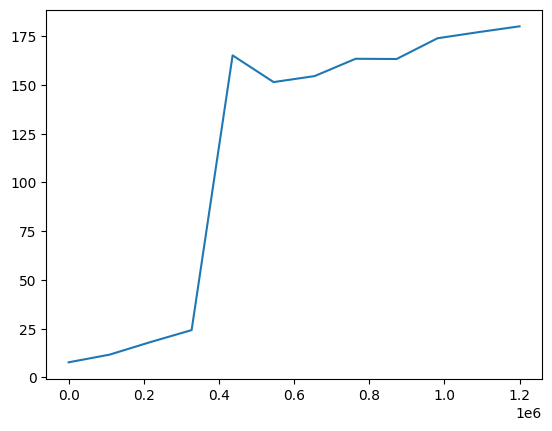

In [ ]:
plt.plot(timesteps,results[0]['results'][:12, :].mean(axis=1))

In [ ]:
data['results'].shape

(16, 5)

In [ ]:
data['ep_lengths'].shape


(16, 5)

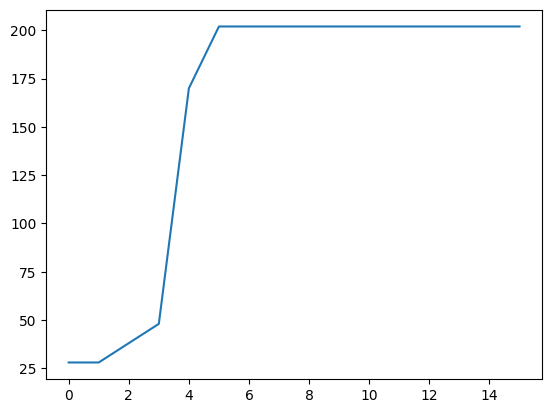

In [ ]:
plt.plot(data['ep_lengths'][:, 1])

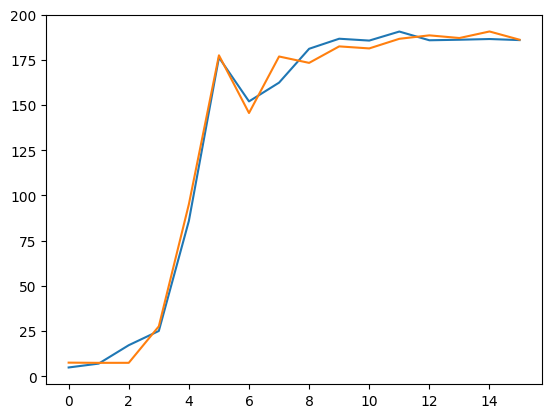

In [ ]:
plt.plot(data['results'][:, 0])
plt.plot(data['results'][:, 1])
# plt.plot(data['results'][:, 2])
# plt.plot(data['results'][:, 3])
# plt.plot(data['results'][:, 4])